In [60]:
%matplotlib inline

import numpy as np
import matplotlib as plt
from astropy.io import fits
import lightkurve as lk
import astropy.units as u
import pandas as pd

In [9]:
data = fits.open('background-readings/TESS-HERMES-cvzTICS/tess_hermes_dr1.0.fits')
data.info

<bound method HDUList.info of [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x11a88c0f0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x11a891d68>]>

In [14]:
data[1].data.shape

(24968,)

In [21]:
hdr = data[1].header
hdr

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  330 / length of dimension 1                          
NAXIS2  =                24968 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   41 / number of table fields                         
TTYPE1  = 'ra      '                                                            
TFORM1  = 'D       '                                                            
TUNIT1  = 'deg     '                                                            
TTYPE2  = 'dec     '                                                            
TFORM2  = 'D       '        

In [25]:
tics = data[1].data['tic_id']
tics.shape

(24968,)

In [61]:
#how to save data as a csv

df = pd.DataFrame(dict({'tic_id': tics}))
df.to_csv('csv-ticids.csv')

In [63]:
#how to read tics csv file


df = pd.read_csv('csv-ticids.csv')

In [65]:
#how to see data structure


df.tic_id.values #remove .values to get column structure

array([141436215, 364588968, 364589323, ..., 348843627, 278723918,
       278685716])

In [72]:
starnames =[]
for i in tics:
    names = 'TIC ' + str(i)
    starnames.append(names)
starnames = np.array(starnames)
starnames[0:5]


array(['TIC 141436215', 'TIC 364588968', 'TIC 364589323', 'TIC 141436204',
       'TIC 141478874'], dtype='<U13')

In [39]:
starnames[0]

'TIC 141436215'

In [40]:
#starname = "TIC 364588968"

# for stars in starnames:
#     print(stars)
lcf = lk.search_lightcurvefile(starnames[0]).download() #this fcn searches lightcurves, not the raw data



/Users/helenfellow/Desktop/anaconda3/lib/python3.7/site-packages/lightkurve/search.py:185: LightkurveWarning: Warning: 10 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning)


In [41]:
#not sure i need, but this is for 2min cadence targets and thats what i want
from lightkurve import TessTargetPixelFile



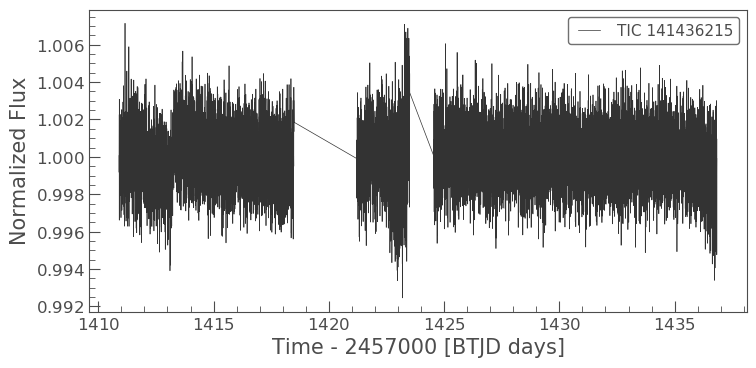

In [73]:
lc.plot()

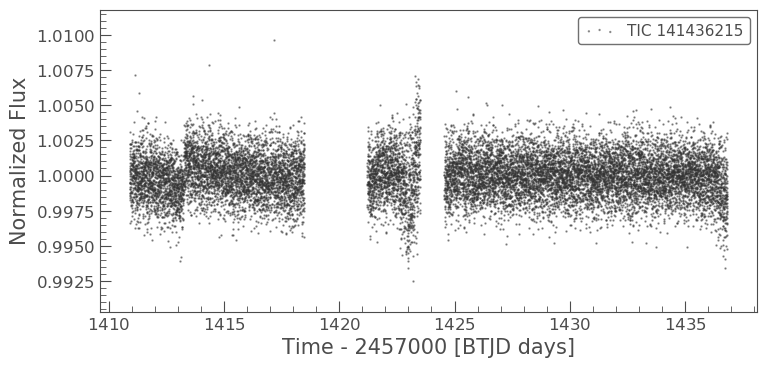

In [42]:
lc = lcf.PDCSAP_FLUX
lc.scatter(alpha=.5, s=.5);

In [45]:
lcf??

In [70]:
#trying to transform to a periodogram

lc = lc.normalize().remove_nans().remove_outliers()
#p = lc.to_periodogram(freq_unit=u.microHertz, max_frequency=400, min_frequency=10)
p = lc.to_periodogram(freq_unit=(1/(u.s*24*60*60)), max_frequency=10, min_frequency=(1/20.))



/Users/helenfellow/Desktop/anaconda3/lib/python3.7/site-packages/lightkurve/periodogram.py:733: LightkurveWarning: `min_frequency` keyword is deprecated, please use `minimum_frequency` instead.
  LightkurveWarning)
/Users/helenfellow/Desktop/anaconda3/lib/python3.7/site-packages/lightkurve/periodogram.py:738: LightkurveWarning: `max_frequency` keyword is deprecated, please use `maximum_frequency` instead.
  LightkurveWarning)


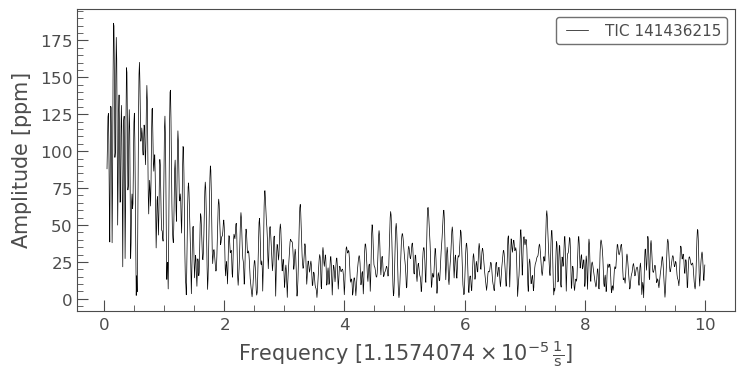

In [71]:
ax = p.plot(c='k');
